#  El archivo que va es param_time.ipynb

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py
snap = h5py.File('../outputs2/snap_1024.h5py', 'r')
def printname(name):
    print name
snap.visit(printname)

subhalo_001
subhalo_001/Center
subhalo_001/Drk
subhalo_001/Drk/Coordinates
subhalo_001/Drk/Masses
subhalo_001/Drk/Velocities
subhalo_001/Gas
subhalo_001/Gas/Coordinates
subhalo_001/Gas/Masses
subhalo_001/Gas/Velocities
subhalo_001/OmegaL0
subhalo_001/OmegaM0
subhalo_001/R200
subhalo_001/Str
subhalo_001/Str/Coordinates
subhalo_001/Str/FormationTime
subhalo_001/Str/Masses
subhalo_001/Str/Velocities
subhalo_001/Time
subhalo_001/aexp
subhalo_001/h
subhalo_002
subhalo_002/Center
subhalo_002/Drk
subhalo_002/Drk/Coordinates
subhalo_002/Drk/Masses
subhalo_002/Drk/Velocities
subhalo_002/Gas
subhalo_002/Gas/Coordinates
subhalo_002/Gas/Masses
subhalo_002/Gas/Velocities
subhalo_002/OmegaL0
subhalo_002/OmegaM0
subhalo_002/R200
subhalo_002/Str
subhalo_002/Str/Coordinates
subhalo_002/Str/FormationTime
subhalo_002/Str/Masses
subhalo_002/Str/Velocities
subhalo_002/Time
subhalo_002/aexp
subhalo_002/h
subhalo_004
subhalo_004/Center
subhalo_004/Drk
subhalo_004/Drk/Coordinates
subhalo_004/Drk/Masses
subhal

In [7]:
# Vamos a calcular los valores de A2max y krot para los distintos tiempos
#t, A2max, krot, Mgal, Mgas, Mdrk, Mvi
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import barstrength1 as strng
import kapparot as krot

vector = (1,2,4)

snapshot = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')

for j in range(len(snapshot)-1,9,-1):
    snap = h5py.File('../outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    print j, snapshot[j]

    for i in range(0,3):
        fo =open('../datos_salida2/time_param_h'+'%s'%vector[i]+'.dat','a')

        pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Velocities'].value

        pgas = snap['subhalo_00'+ str('%s'%vector[i]) + '/Gas/Coordinates'].value
        mgas = snap['subhalo_00'+ str('%s'%vector[i]) + '/Gas/Masses'].value

        pdrk = snap['subhalo_00'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        mdrk = snap['subhalo_00'+ str('%s'%vector[i])+ '/Drk/Masses'].value

        r200 = snap['subhalo_00'+ str('%s'%vector[i]) + '/R200'].value
        time = snap['subhalo_00'+ str('%s'%vector[i]) + '/Time'].value
        cm   = snap['subhalo_00'+ str('%s'%vector[i]) + '/Center'].value
        aexp = snap['subhalo_00'+ str('%s'%vector[i]) + '/aexp'].value
        #tform = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/FormationTime'].value

#---------paso las coordenadas respecto al centro de la galaxia------------------------
        xstr = (pstr[:,0]-cm[0])*aexp
        ystr = (pstr[:,1]-cm[1])*aexp
        zstr = (pstr[:,2]-cm[2])*aexp
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

        xgas = (pgas[:,0]-cm[0])*aexp
        ygas = (pgas[:,1]-cm[1])*aexp
        zgas = (pgas[:,2]-cm[2])*aexp
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

        xdrk = (pdrk[:,0]-cm[0])*aexp
        ydrk = (pdrk[:,1]-cm[1])*aexp
        zdrk = (pdrk[:,2]-cm[2])*aexp
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#-------------------------------------------------
        rgal=0.15*r200

        limit = np.where(rstr<rgal)
        r_sort = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])

        limit_gas = np.where(rgas<rgal)
        rgas_sort = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])

        Mc_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mc_str[-1]

        Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])
        M_gas = Mc_gas[-1]

#------------------ calculamos R90------------------------------------------
        razon = Mc_str/M_gal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)

        r50 = r_sort[cincuenta]
        r90 = r_sort[noventa]

#------------------masa total en r200 (Mvir)--------------------------
        rvir= concatenate([rstr,rgas,rdrk])
        mvir= concatenate([mstr, mgas, mdrk])

        limit_vir = np.where(rvir<r200)
        rvir_sort = np.sort(rvir[limit_vir])
        rvir_indice = np.argsort(rvir[limit_vir])

        Mc_vir = cumsum((mvir[limit_vir])[rvir_indice])

        M_vir = Mc_vir[-1]

#------------------masa drk en r200 (Mdrk)--------------------------  
        limit_drk = np.where(rdrk<r200)
        rdrk_sort = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])

        Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

        M_drk = Mc_drk[-1]

#---------------------------------------------------------------------------            
        corte1,=np.where(rstr<r90[-1])
        corte2,=np.where(rstr<2*r50[-1])
        veloc,=np.where(rstr<r50[-1])

#------------componentes de la velocidad del centro de masa------------------
        vxcm = sum(mstr[veloc]*vel[veloc,0])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*vel[veloc,1])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*vel[veloc,2])/sum(mstr[veloc])

#-------velocidades de las estrellas respecto del centro de masa de la galaxia----
        vx = vel[:,0] - vxcm
        vy = vel[:,1] - vycm
        vz = vel[:,2] - vzcm

        xn,yn,zn,vxn,vyn,vzn = rot.rot(mstr,xstr,ystr,zstr,vx,vy,vz,r90[-1])

# ---------------------calculamos el A2max en un radio de 2r50--------------------
        A2max, rmax = strng.a2max(mstr[corte2], xn[corte2], yn[corte2], 20)

#-----------------------calculamos el krot-----------------------------
        k_rot = krot.kapa(mstr[corte1], xn[corte1], yn[corte1], zn[corte1],
                     vxn[corte1], vyn[corte1], vzn[corte1])

        fo.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% A2max) +'\t'+
                 str('%12.6f'% k_rot) +'\t'+
                 str('%12.6f'% M_gal) +'\t'+
                 str('%12.6f'% M_gas) +'\t'+
                 str('%12.6f'% M_drk) +'\t'+
                 str('%12.6f'% M_vir) +'\n')
        fo.close()


59 1024
58 1008
57 0992
56 0976
55 0960
54 0944
53 0928
52 0912
51 0896
50 0880
48 0848
47 0832
46 0816
45 0800
44 0784
43 0768
42 0752
41 0736
40 0720
39 0704
38 0688
37 0672
36 0656
35 0640
34 0624
33 0608
32 0592
31 0576
30 0560
29 0544
28 0528
27 0512
26 0496
25 0480
24 0464
23 0453
22 0448
21 0432
20 0416
19 0400
18 0384
17 0368
16 0352
15 0336
14 0320
13 0304
12 0288
11 0272
10 0256


In [10]:
snapshot = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')

for j in range(len(snapshot)-1,9,-1):
    print j, snapshot[j]

59 1024
58 1008
57 0992
56 0976
55 0960
54 0944
53 0928
52 0912
51 0896
50 0880
49 0864
48 0848
47 0832
46 0816
45 0800
44 0784
43 0768
42 0752
41 0736
40 0720
39 0704
38 0688
37 0672
36 0656
35 0640
34 0624
33 0608
32 0592
31 0576
30 0560
29 0544
28 0528
27 0512
26 0496
25 0480
24 0464
23 0453
22 0448
21 0432
20 0416
19 0400
18 0384
17 0368
16 0352
15 0336
14 0320
13 0304
12 0288
11 0272
10 0256


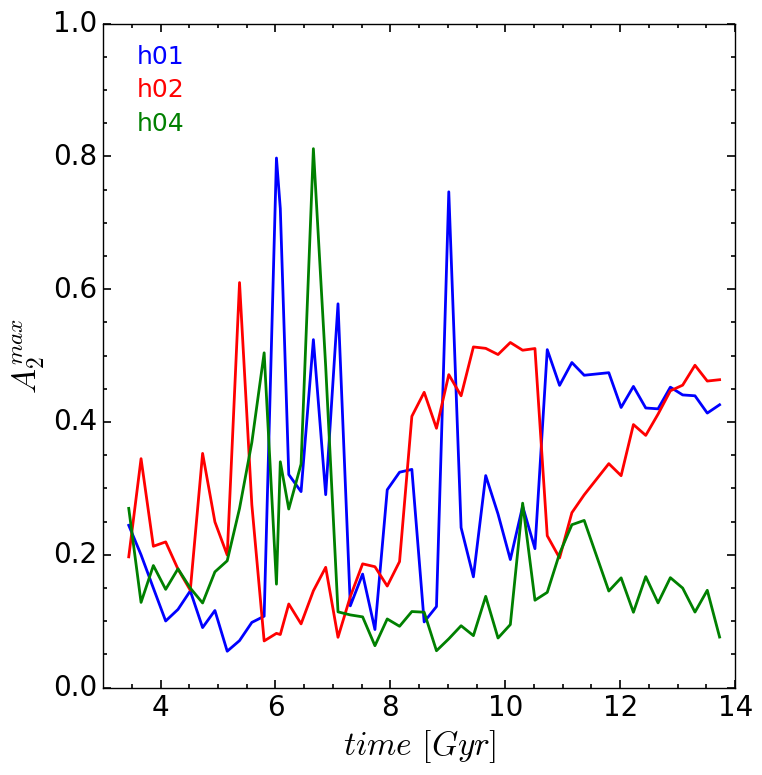

In [8]:
#Grafico de time vs A2max (en 2r50)
#t, A2max, krot, Mgal, Mgas, Mdrk, Mvir
import matplotlib.pyplot as plt

vector = (1,2,4)
vec2 = ('blue', 'red', 'green')
j=0
for i in range(0,3):
    
    read = np.loadtxt('../datos_salida/time_param_h'+'%s'%vector[i]+'.dat')
    
    t=read [:,0]
    A2max=read[:,1]

    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    ax0.plot(t,A2max,'k', lw=2, color = '%s'%vec2[i])
    ax0.set_ylim(0,1)
    ax0.set_xlim(3,14)
    ax0.set_xlabel(u'$time$ $[Gyr]$', fontsize=24)
    ax0.set_ylabel(u'$A_{2}^{max}$', fontsize=24)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=20)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x = 4, y = 0.95-(0.05*j), s ='h0'+ str('%s'%vector[i]),color = '%s'%vec2[i],
            fontsize = 18, verticalalignment = 'center', horizontalalignment = 'center')
        #fig.savefig('time_vs_A2max-1.png', dpi = 80)
    j+=1

plt.show()

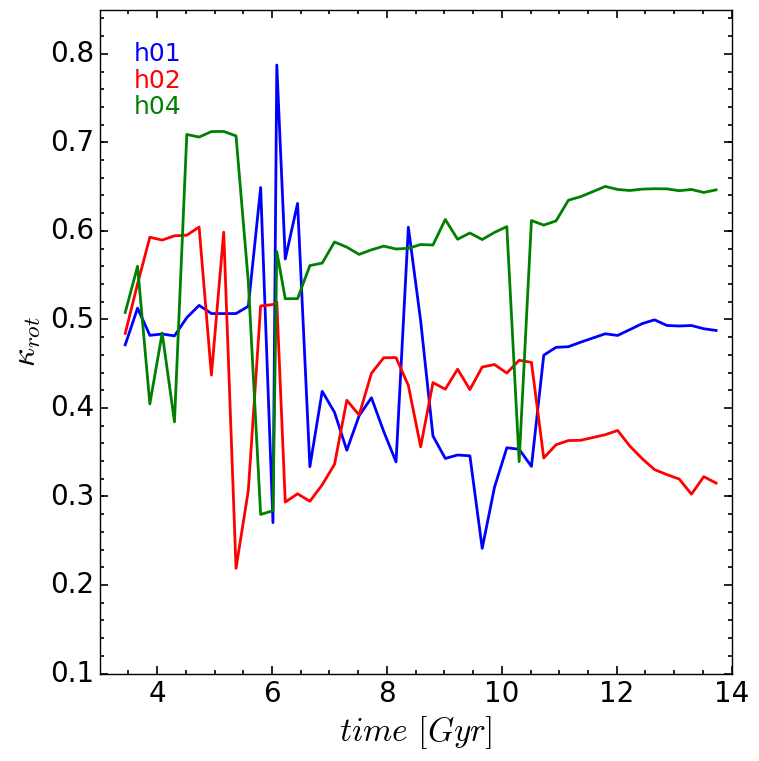

In [9]:
# Grafico de time vs krot
#t, A2max, krot, Mgal,  Mgas, Mdrk, Mvir
import matplotlib.pyplot as plt

vector = (1,2,4)
vec2 = ('blue', 'red', 'green')
j=0

for i in range(0,3):
    read = np.loadtxt('../datos_salida/time_param_h'+'%s'%vector[i]+'.dat')
    
    t = read[:,0]
    krot = read[:,2]
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    ax0.plot(t,krot,'k', lw=2, color = '%s'%vec2[i])
    ax0.set_ylim(0.1,0.85)
    ax0.set_xlim(3,14)
    ax0.set_xlabel(u'$time$ $[Gyr]$', fontsize=24)
    ax0.set_ylabel(u'$\kappa_{rot}$', fontsize=24)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=20)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x = 4, y = 0.8-(0.03*j), s ='h0'+ str('%s'%vector[i]),color = '%s'%vec2[i],
            fontsize = 18, verticalalignment = 'center', horizontalalignment = 'center')
    j+=1
plt.show()
    
    

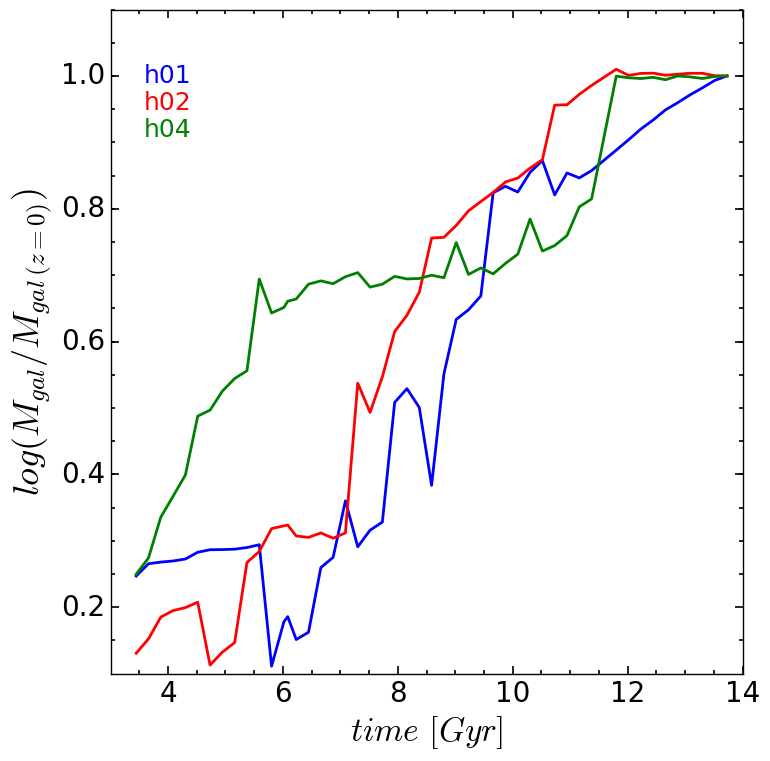

In [10]:
# Grafico de time vs Mgal
#t, A2max, krot, Mgal,  Mgas, Mdrk, Mvir
import matplotlib.pyplot as plt

vector = (1,2,4)
vec2 = ('blue', 'red', 'green')
j=0

for i in range(0,3):

    read = np.loadtxt('../datos_salida/time_param_h'+'%s'%vector[i]+'.dat')
    
    t = read[:,0]
    Mgal = read[:,3]
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    ax0.plot(t,Mgal/Mgal[0],'k', lw=2, color = '%s'%vec2[i])
    ax0.set_xlabel(u'$time$ $[Gyr]$', fontsize=24)
    ax0.set_ylabel(u'$log(M_{gal}/M_{gal\:(z=0)})$', fontsize=26)
    ax0.set_xlim(3,14)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=20)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x = 4, y = 1-(0.04*j), s ='h0'+ str('%s'%vector[i]),color = '%s'%vec2[i],
            fontsize = 18, verticalalignment = 'center', horizontalalignment = 'center')
    j+=1
        
plt.show()
    

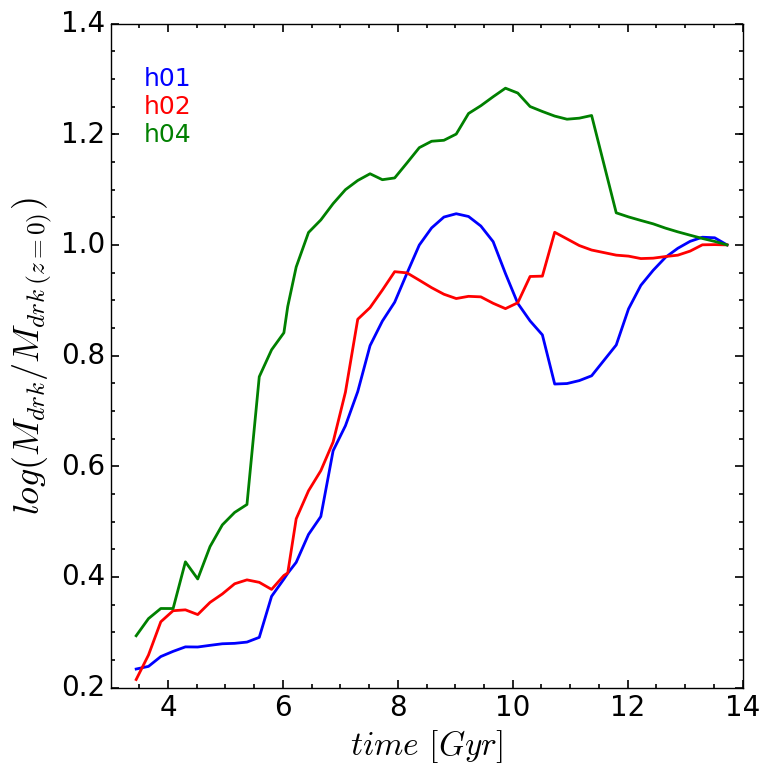

In [13]:
# Grafico de time vs Mdrk
#t, A2max, krot, Mgal, Mgas, Mdrk, Mvir
import matplotlib.pyplot as plt

vector = (1,2,4)
vec2 = ('blue', 'red', 'green')
j=0
 
for i in range(0,3):

    read = np.loadtxt('../datos_salida/time_param_h'+'%s'%vector[i]+'.dat')
    
    t = read[:,0]
    Mdrk = read[:,5]
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    ax0.plot(t,Mdrk/Mdrk[0],'k', lw=2, color = '%s'%vec2[i])
    ax0.set_xlabel(u'$time$ $[Gyr]$', fontsize=24)
    ax0.set_ylabel(u'$log(M_{drk}/M_{drk\:(z=0)})$', fontsize=26)
    ax0.set_xlim(3,14)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=20)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x = 4, y = 1.3-(0.05*j), s ='h0'+ str('%s'%vector[i]),color = '%s'%vec2[i],
            fontsize = 18, verticalalignment = 'center', horizontalalignment = 'center')
    j+=1
    
plt.show()
    

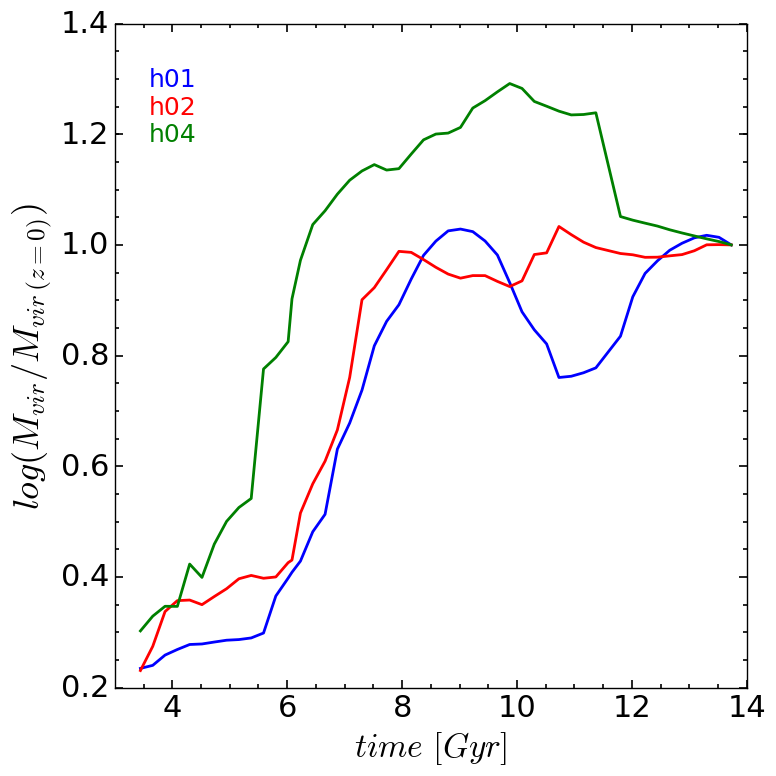

In [14]:
# Grafico de time vs Mvir
#t, A2max, krot, Mgal, Mgas, Mdrk, Mvir
import matplotlib.pyplot as plt

vector = (1,2,4)
vec2 = ('blue', 'red', 'green')
j=0

for i in range(0,3):

    read = np.loadtxt('../datos_salida/time_param_h'+'%s'%vector[i]+'.dat')
    
    t = read[:,0]
    Mvir = read[:,6]
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    ax0.plot(t,Mvir/Mvir[0],'k', lw=2, color = '%s'%vec2[i])
    ax0.set_xlabel(u'$time$ $[Gyr]$', fontsize=24)
    ax0.set_ylabel(u'$log(M_{vir}/M_{vir\:(z=0)})$', fontsize=26)
    ax0.set_xlim(3,14)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=22)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x = 4, y = 1.3-(0.05*j), s ='h0'+ str('%s'%vector[i]),color = '%s'%vec2[i],
            fontsize = 18, verticalalignment = 'center', horizontalalignment = 'center')
   
    j+=1  
plt.show()
    

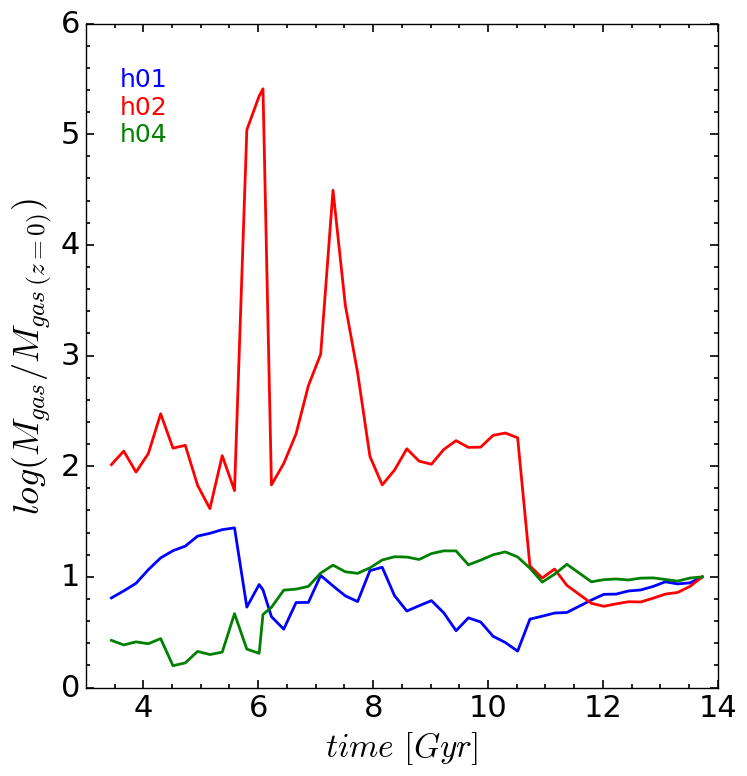

In [15]:
# Grafico de time vs Mgas
#t, A2max, krot, Mgal, Mgas, Mdrk, Mvir
import matplotlib.pyplot as plt

vector = (1,2,4)
vec2 = ('blue', 'red', 'green')
j=0

for i in range(0,3):

    read = np.loadtxt('../datos_salida/time_param_h'+'%s'%vector[i]+'.dat')
    
    t = read[:,0]
    Mgas = read[:,4]
    
    fig = plt.figure(1,figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
    ax0=fig.add_subplot(111)
    ax0.plot(t,Mgas/Mgas[0],'k', lw=2, color = '%s'%vec2[i])
    ax0.set_xlabel(u'$time$ $[Gyr]$', fontsize=24)
    ax0.set_ylabel(u'$log(M_{gas}/M_{gas\:(z=0)})$', fontsize=26)
    ax0.set_xlim(3,14)
    ax0.minorticks_on()
    ax0.tick_params( labelsize=22)
    ax0.tick_params('both', length=3, width=1.2,which='minor')
    ax0.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x = 4, y = 5.5-(0.25*j), s ='h0'+ str('%s'%vector[i]),color = '%s'%vec2[i],
            fontsize = 18, verticalalignment = 'center', horizontalalignment = 'center')
   
    j+=1  
plt.show()